In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [78]:
sales_df=pd.read_csv("D:\\Users\\Faizan Sait\\Downloads\\advertising_sales_data.csv")
sales_df

,Campaign,TV,Radio,Newspaper,Sales
0,camp1,230.1,37.8,69.2,22.1
1,camp2,44.5,39.3,45.1,10.4
2,camp3,17.2,45.9,69.3,12.0
3,camp4,151.5,41.3,58.5,16.5
4,camp5,180.8,10.8,58.4,17.9
...,...,...,...,...,...
195,camp196,38.2,3.7,13.8,7.6
196,camp197,94.2,4.9,8.1,14.0
197,camp198,177.0,9.3,6.4,14.8
198,camp199,283.6,42.0,66.2,25.5


In [31]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Campaign   200 non-null    object 
 1   TV         200 non-null    float64
 2   Radio      198 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB


In [32]:
sales_df.columns

Index(['Campaign', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

#### Question 1 : What is the average amount spent on TV advertising in the dataset?

In [33]:
tv_spending=df['TV']
tv_spending.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [34]:
print("the average amount spent on tv advertising is " ,tv_spending.mean())

the average amount spent on tv advertising is  147.0425


#### Question 2: What is the correlation between radio advertising expenditure and product sales?

In [35]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Campaign   200 non-null    object 
 1   TV         200 non-null    float64
 2   Radio      198 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB


In [45]:
radio_spending = sales_df['Radio']
sales = sales_df['Sales']

print(radio_spending.head())
print(sales.head())

0    37.8
1    39.3
2    45.9
3    41.3
4    10.8
Name: Radio, dtype: float64
0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64


In [47]:
#To calculate the correlation between radio_spending and sales
correlation_radio_sales = radio_spending.corr(sales)
print(correlation_radio_sales)

0.34972771292078386


In [49]:
correl = sales.corr(radio_spending)
print(correl)
#Direction: The correlation coefficient is positive (0.35 > 0). This indicates that there is a tendency for product sales to increase as the expenditure on radio advertising increases.
#Strength: The correlation coefficient of 0.35 falls within the range of weak to moderate (closer to 0.3 than 0.7). This suggests that while there is a positive relationship between radio advertising and sales,
#it's not a very strong one. Changes in radio advertising expenditure are associated with changes in sales, 
#but other factors likely also play a significant role in determining the final sales figures.

0.3497277129207838


#### Question 3: Which advertising medium has the highest impact on sales based on the dataset?

In [50]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Campaign   200 non-null    object 
 1   TV         200 non-null    float64
 2   Radio      198 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB


In [53]:
#Calculate the correlation of each advertising medium with sales 
tv=sales_df['TV']
radio=sales_df['Radio']
newspaper=sales_df['Newspaper']
sales=sales_df['Sales']

corr_tv_sales=tv.corr(sales)
print("Correlation between TV and Sales:",corr_tv_sales)

corr_radio_sales=radio.corr(sales)
print("Correlation between Radio and Sales:",corr_radio_sales)

corr_newspaper_sales=newspaper.corr(sales)
print("Correlation between Newspaper and Sales:",corr_newspaper_sales)

Correlation between TV and Sales: 0.9012079133023305
Correlation between Radio and Sales: 0.34972771292078386
Correlation between Newspaper and Sales: 0.1579600261549263


##### The advertising medium with the highest positive correlation with 'Sales' is TV, with a correlation coefficient of approximately 0.90. This indicates a very strong positive linear relationship between the amount spent on TV advertising and the number of units sold. Based on this dataset, TV advertising appears to have the highest impact on sales among the three media.

#### Question 4: Plot a linear regression line that includes all variables (TV, Radio, Newspaper) to predict Sales, and visualize the model's predictions against the actual sales values.

In [79]:
#Define the features (independent variables)
X =sales_df[['TV','Radio','Newspaper']]

#define the target variable (dependent variables)
y=sales_df['Sales']

In [90]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")

Coefficients: [0.05444925 0.10707013 0.00028207]
Intercept: 4.625933730365281


In [81]:
X.isnull().sum()

TV           0
Radio        2
Newspaper    0
dtype: int64

In [91]:
median_income = X['Radio'].median()
X['Radio'].fillna(median_income, inplace=True)

C:\Users\Faizan\AppData\Local\Temp\ipykernel_82096\4232852886.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Radio'].fillna(median_income, inplace=True)
C:\Users\Faizan\AppData\Local\Temp\ipykernel_82096\4232852886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Radio'].fillna(median_income, inplace=True)


In [88]:
X.isnull().sum()
# the null values have been removed 

TV           0
Radio        0
Newspaper    0
dtype: int64

In [102]:
#Now we can train the model 
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")

Coefficients: [0.05444925 0.10707013 0.00028207]
Intercept: 4.625933730365281


In [103]:
X.isnull().sum()

TV           0
Radio        0
Newspaper    0
dtype: int64

In [104]:
# Make predictions on the entire dataset
predictions = model.predict(X)

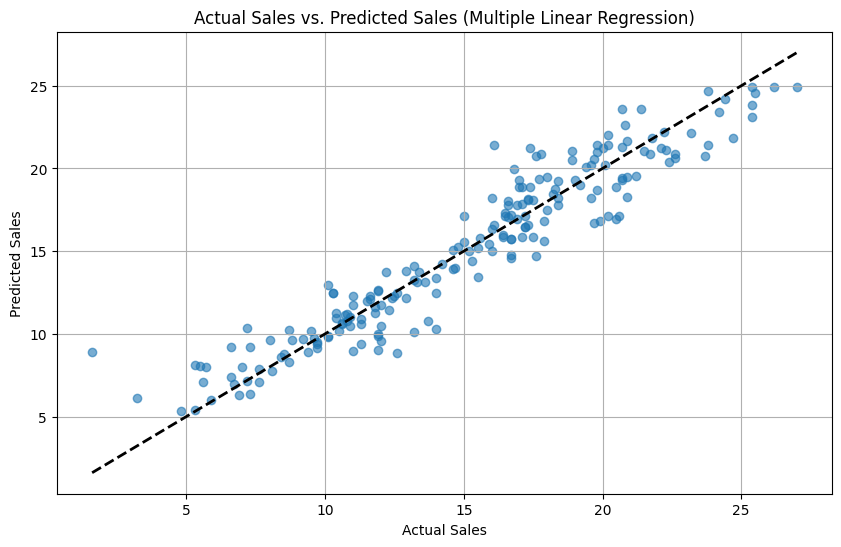

In [105]:
plt.figure(figsize=(10, 6))
plt.scatter(y, predictions, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2) # Diagonal line for perfect predictions
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual Sales vs. Predicted Sales (Multiple Linear Regression)')
plt.grid(True)
plt.show()

In [96]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [100]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [111]:
print(X.iloc[15,:])
print(y.iloc[15])

TV           195.4
Radio         47.7
Newspaper     52.9
Name: 15, dtype: float64
22.4


In [112]:
exp=np.array([[195.4,47.7,52.9]])
print(model.predict(exp))

# ACTUAL VALUE IS 22.4

[20.38748301]


C:\Users\Faizan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#### Question 5: How would sales be predicted for a new set of advertising expenditures: $200 on TV, $40 on Radio, and $50 on Newspaper?

In [113]:
new_set=np.array([[200,40,50]])
print(model.predict(new_set))

#The expected sales is to be 19.18 dolllars

[19.81269156]


C:\Users\Faizan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [114]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = sales_df[['TV', 'Radio', 'Newspaper']]
y = sales_df['Sales']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (160, 3)
Shape of X_test: (40, 3)
Shape of y_train: (160,)
Shape of y_test: (40,)


In [115]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training features and transform them
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing features using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames for easier handling (optional)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("\nFirst 5 rows of scaled training data:")
print(X_train_scaled_df.head())
print("\nFirst 5 rows of scaled testing data:")
print(X_test_scaled_df.head())


First 5 rows of scaled training data:
         TV     Radio  Newspaper
0 -0.404248 -1.027614  -0.337675
1  0.320608 -0.919204  -1.161439
2 -1.270511  0.259762   0.254251
3 -1.042359 -0.695607  -0.574446
4  0.879103 -1.386724  -0.707629

First 5 rows of scaled testing data:
         TV     Radio  Newspaper
0  0.157812  0.591770   1.132275
1  0.539253  1.682652   1.132275
2  1.697834  0.368173   0.653801
3 -1.643633  0.950880   0.752455
4  0.835137  1.770735  -1.319286


In [116]:
from sklearn.linear_model import LinearRegression

# Create a new linear regression model for normalized data
model_scaled = LinearRegression()

# Fit the model to the scaled training data
model_scaled.fit(X_train_scaled, y_train)

# Get the coefficients and intercept of the scaled model
coefficients_scaled = model_scaled.coef_
intercept_scaled = model_scaled.intercept_

print(f"\nCoefficients (scaled model): {coefficients_scaled}")
print(f"Intercept (scaled model): {intercept_scaled}")


Coefficients (scaled model): [4.58715533 1.49049946 0.08714768]
Intercept (scaled model): 15.330625000000003


In [117]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the scaled testing data
predictions_scaled = model_scaled.predict(X_test_scaled)

# Evaluate the model
mse_scaled = mean_squared_error(y_test, predictions_scaled)
r2_scaled = r2_score(y_test, predictions_scaled)

print(f"\nMean Squared Error (scaled data): {mse_scaled:.2f}")
print(f"R-squared (scaled data): {r2_scaled:.2f}")


Mean Squared Error (scaled data): 2.90
R-squared (scaled data): 0.91


In [118]:
# Make predictions on the unscaled testing data using the model from Question 4
predictions_unscaled = model.predict(X_test)

# Evaluate the unscaled model
mse_unscaled = mean_squared_error(y_test, predictions_unscaled)
r2_unscaled = r2_score(y_test, predictions_unscaled)

print(f"\nMean Squared Error (unscaled data): {mse_unscaled:.2f}")
print(f"R-squared (unscaled data): {r2_unscaled:.2f}")


Mean Squared Error (unscaled data): 2.76
R-squared (unscaled data): 0.91


##### question 7 7.	What is the impact on the sales prediction when only radio and newspaper advertising expenditures are used as predictors?

In [119]:
# Define the reduced set of features
X_reduced = sales_df[['Radio', 'Newspaper']]

# Split the data into training and testing sets (using the same split as before)
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

print("Shape of X_train_reduced:", X_train_reduced.shape)
print("Shape of X_test_reduced:", X_test_reduced.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train_reduced: (160, 2)
Shape of X_test_reduced: (40, 2)
Shape of y_train: (160,)
Shape of y_test: (40,)


In [120]:
# Create a new linear regression model
model_reduced = LinearRegression()

# Fit the model to the training data with reduced features
model_reduced.fit(X_train_reduced, y_train)

# Get the coefficients and intercept of the reduced model
coefficients_reduced = model_reduced.coef_
intercept_reduced = model_reduced.intercept_

print(f"\nCoefficients (reduced model - Radio, Newspaper): {coefficients_reduced}")
print(f"Intercept (reduced model): {intercept_reduced}")


Coefficients (reduced model - Radio, Newspaper): [0.11800478 0.00380607]
Intercept (reduced model): 12.51832305816003


In [121]:
# Make predictions on the test data with reduced features
predictions_reduced = model_reduced.predict(X_test_reduced)

# Evaluate the model
mse_reduced = mean_squared_error(y_test, predictions_reduced)
r2_reduced = r2_score(y_test, predictions_reduced)

print(f"\nMean Squared Error (Radio, Newspaper only): {mse_reduced:.2f}")
print(f"R-squared (Radio, Newspaper only): {r2_reduced:.2f}")


Mean Squared Error (Radio, Newspaper only): 27.51
R-squared (Radio, Newspaper only): 0.11


In [ ]:
'''
Mean Squared Error (MSE):

The MSE increased significantly from 3.17 (when using TV, Radio, Newspaper) to 27.51 
(when using only Radio and Newspaper). A higher MSE indicates that the model's predictions
are, on average, much further away from the actual sales values when 'TV' is excluded.
R-squared:

The R-squared value dropped dramatically from 0.89 to 0.11 when 'TV' was removed. 
An R-squared of 0.89 means that the model with all three predictors explained 89% of the
variance in sales. However, with only 'Radio' and 'Newspaper', the model only explains 
11% of the variance in sales.



In [ ]:
'''
The model's accuracy in predicting sales decreases significantly, as indicated by the much higher MSE.
The model's ability to explain the variability in sales is greatly reduced, 
as shown by the much lower R-squared value.
'''

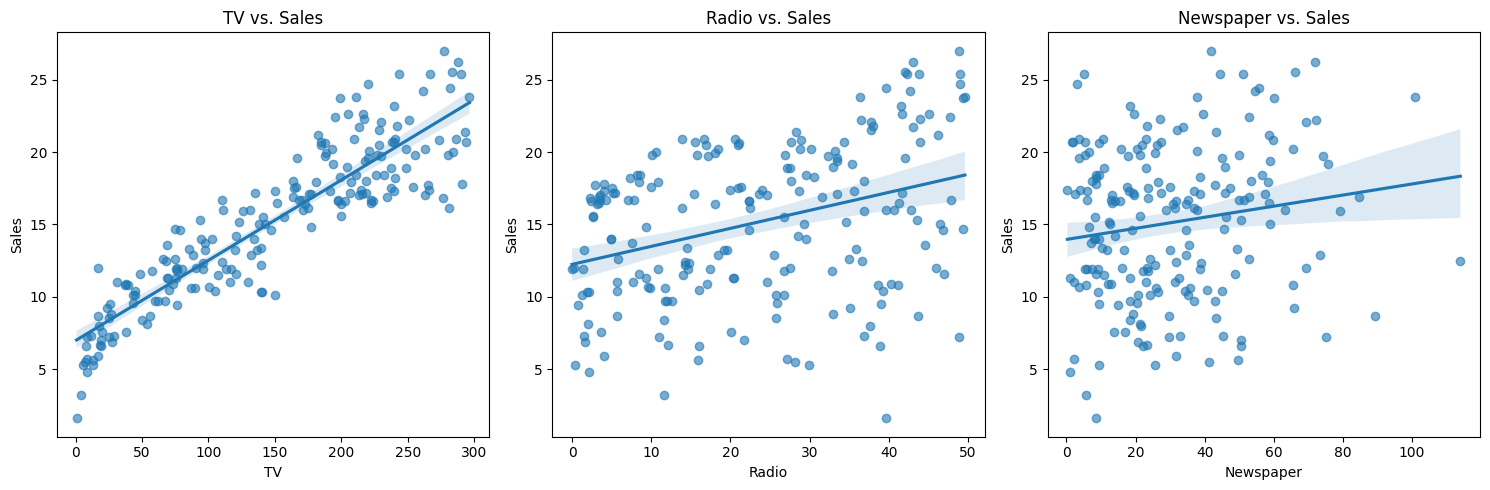

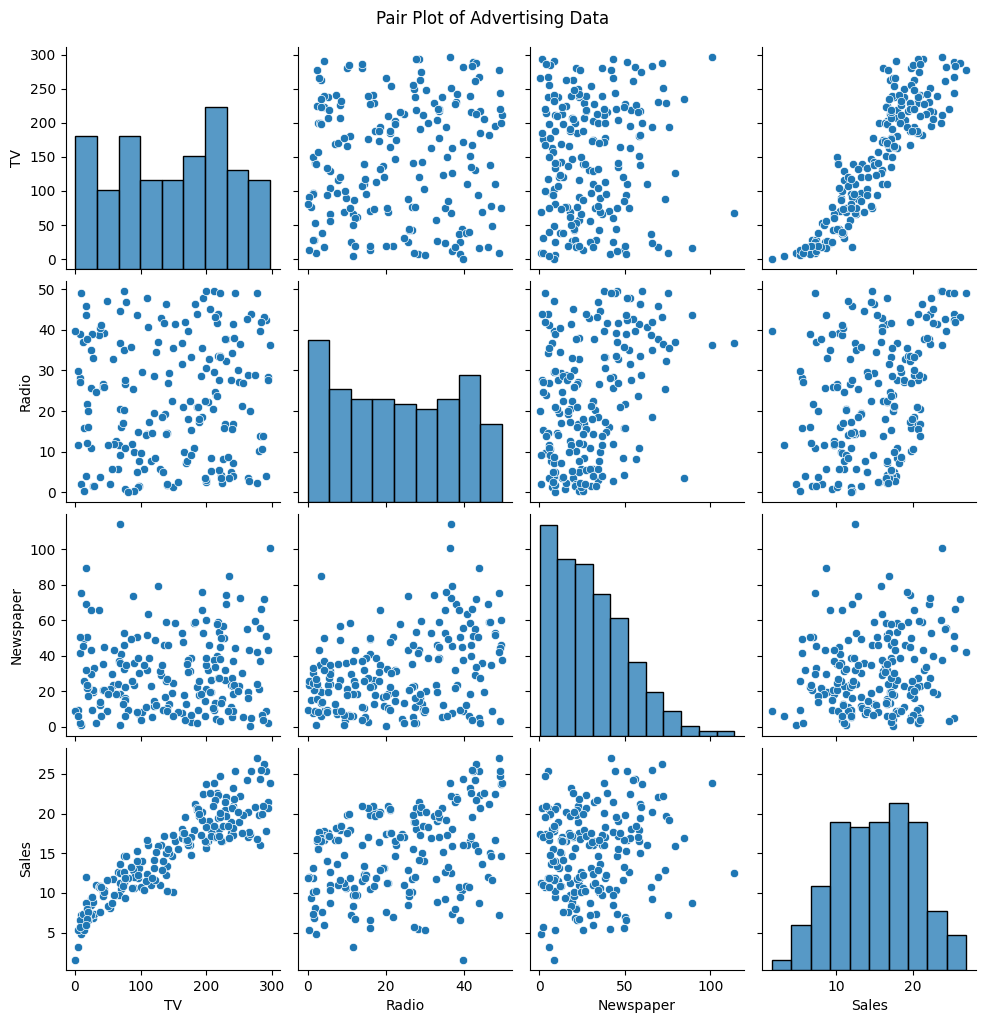

ValueError: could not convert string to float: 'camp1'

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'sales_df'

# 1. Scatter Plots with Regression Lines (Relationship between each ad type and Sales)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.regplot(x='TV', y='Sales', data=sales_df, scatter_kws={'alpha':0.6})
plt.title('TV vs. Sales')

plt.subplot(1, 3, 2)
sns.regplot(x='Radio', y='Sales', data=sales_df, scatter_kws={'alpha':0.6})
plt.title('Radio vs. Sales')

plt.subplot(1, 3, 3)
sns.regplot(x='Newspaper', y='Sales', data=sales_df, scatter_kws={'alpha':0.6})
plt.title('Newspaper vs. Sales')

plt.tight_layout()
plt.show()
# Inference: Visualizes the linear relationship and the spread of data points for each advertising medium against Sales, reinforcing the correlation findings.

# 2. Pair Plot (Relationships between all numerical variables)
sns.pairplot(sales_df)
plt.suptitle('Pair Plot of Advertising Data', y=1.02)
plt.show()
# Inference: Shows pairwise relationships, including the distribution of each variable on the diagonal. Helps understand inter-dependencies and relationships with Sales.

# 3. Heatmap of Correlation Matrix
correlation_matrix = sales_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Advertising Data')
plt.show()
# Inference: Clearly displays the correlation coefficients between all pairs of variables, making it easy to see the strong positive correlation between TV and Sales.

# 4. Residual Plots (To assess the linearity of the model - after training a model)
X = sales_df[['TV', 'Radio', 'Newspaper']]
y = sales_df['Sales']
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)
residuals = y - predictions

plt.figure(figsize=(8, 6))
sns.scatterplot(x=predictions, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.grid(True)
plt.show()
# Inference: If the residuals are randomly scattered around zero without a clear pattern, it suggests the linear model is a good fit. Patterns might indicate non-linearity.

# 5. Distribution Plots (To understand the distribution of each feature)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(sales_df['TV'], kde=True)
plt.title('Distribution of TV Spending')

plt.subplot(1, 3, 2)
sns.histplot(sales_df['Radio'], kde=True)
plt.title('Distribution of Radio Spending')

plt.subplot(1, 3, 3)
sns.histplot(sales_df['Newspaper'], kde=True)
plt.title('Distribution of Newspaper Spending')

plt.tight_layout()
plt.show()

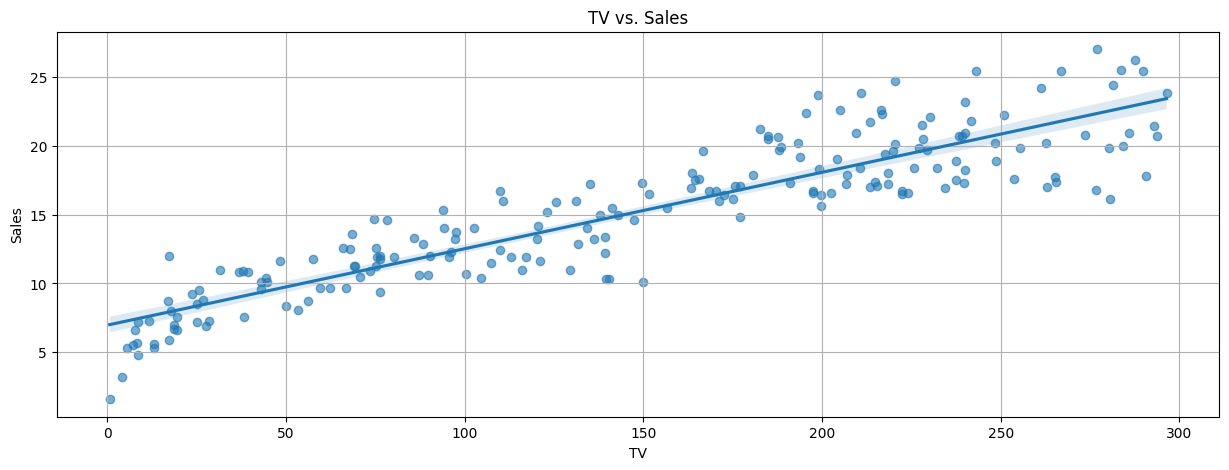

In [125]:
plt.figure(figsize=(15, 5))
sns.regplot(x='TV', y='Sales', data=sales_df, scatter_kws={'alpha':0.6})
plt.title('TV vs. Sales')
plt.grid(True)
plt.show()

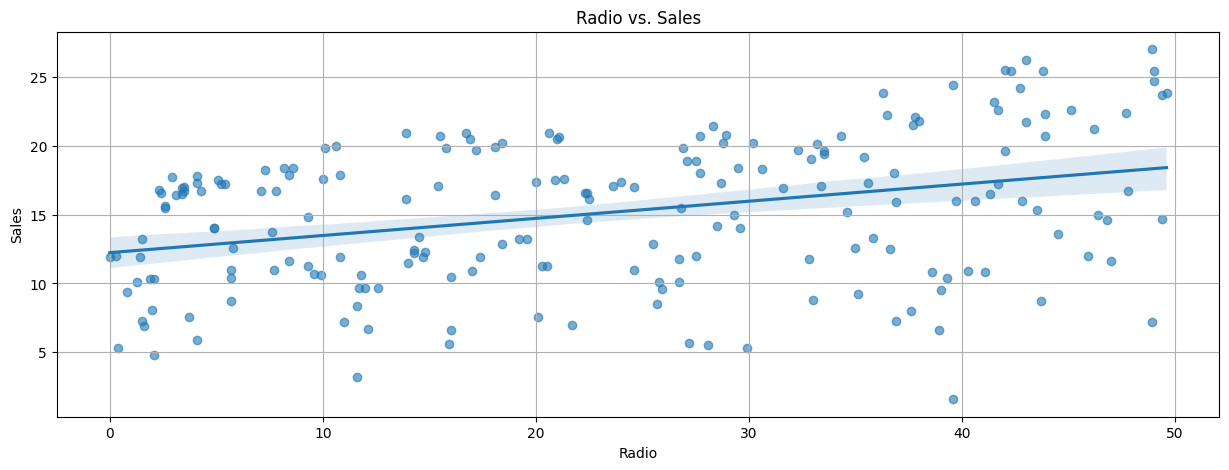

In [133]:
plt.figure(figsize=(15, 5))
sns.regplot(x='Radio', y='Sales', data=sales_df, scatter_kws={'alpha':0.6})
plt.title('Radio vs. Sales')
plt.grid(True)
plt.show()

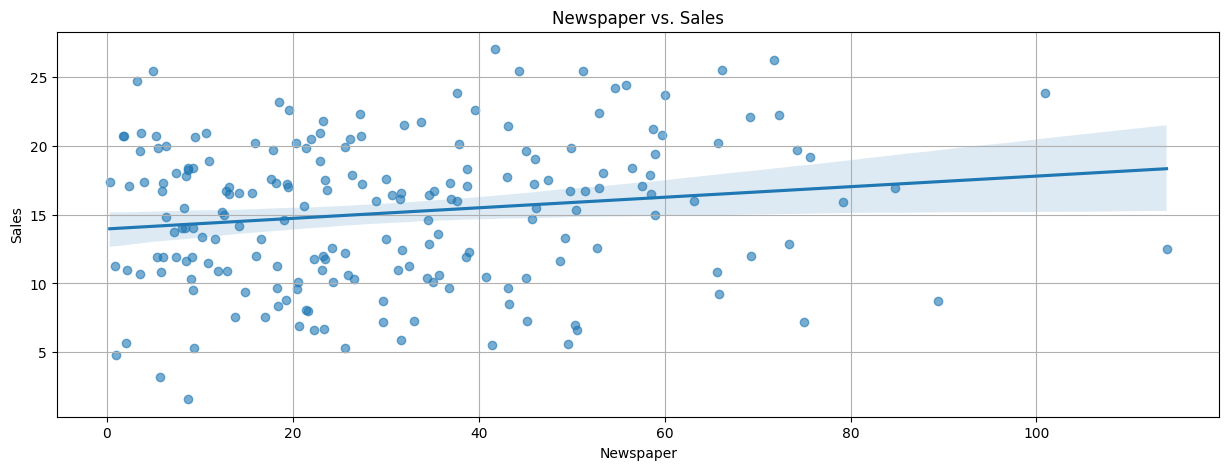

In [134]:
plt.figure(figsize=(15, 5))
sns.regplot(x='Newspaper', y='Sales', data=sales_df, scatter_kws={'alpha':0.6})
plt.title('Newspaper vs. Sales')
plt.grid(True)
plt.show()

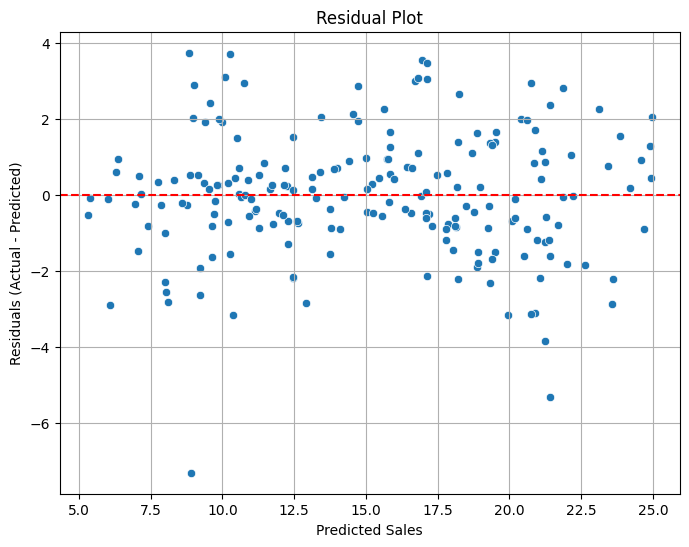

In [129]:
X = sales_df[['TV', 'Radio', 'Newspaper']]
y = sales_df['Sales']
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)
residuals = y - predictions

plt.figure(figsize=(8, 6))
sns.scatterplot(x=predictions, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

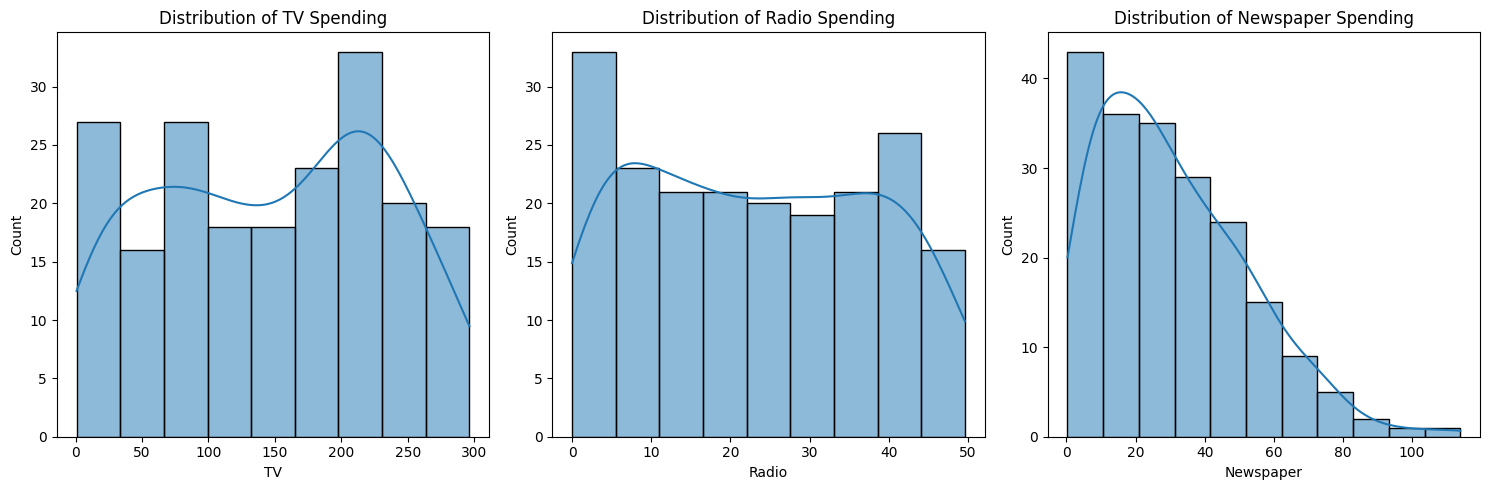

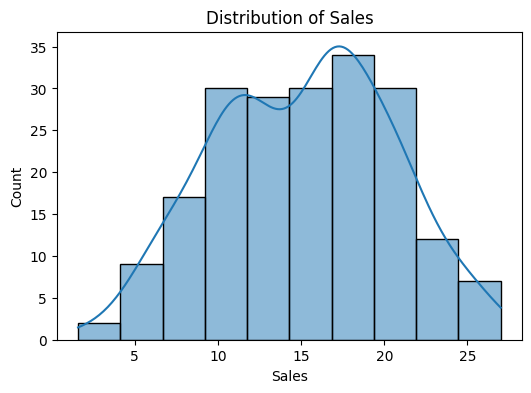

In [130]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(sales_df['TV'], kde=True)
plt.title('Distribution of TV Spending')

plt.subplot(1, 3, 2)
sns.histplot(sales_df['Radio'], kde=True)
plt.title('Distribution of Radio Spending')

plt.subplot(1, 3, 3)
sns.histplot(sales_df['Newspaper'], kde=True)
plt.title('Distribution of Newspaper Spending')

plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(sales_df['Sales'], kde=True)
plt.title('Distribution of Sales')
plt.show()